<a href="https://colab.research.google.com/github/NzimbaEnvoy/Fraud_Detection-Masters-Project-/blob/main/Credit_card_Fraud_Deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#Importing Libraries
import os
import pandas as pd
import numpy as np
import time
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.metrics import Precision, Recall
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE, ADASYN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, LSTM, TimeDistributed, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.utils.class_weight import compute_class_weight
import itertools
import shap


In [ ]:
# Path to your files
base_path = "/content/drive/MyDrive/Thesis Project"

train_path = os.path.join(base_path, "train_data_Credit Card.csv")
test_path = os.path.join(base_path, "test_data_Credit Card.csv")

# Load data
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [ ]:
train_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.261102,0
1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.231013,0
2,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.150493,0
3,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,-0.351359,0
4,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,-0.199715,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199356,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,-0.111640,...,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,-0.270646,0
199357,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,-0.594242,...,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,-0.033758,0
199358,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.369229,0
199359,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.085040,0


In [ ]:
X_train = train_df.drop("Class", axis=1)
y_train = train_df["Class"]

X_test = test_df.drop("Class", axis=1)
y_test = test_df["Class"]


CNN BASELINE

In [ ]:
# Reshaping for CNN input
X_train_cnn = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn  = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

Hyper Parameter Tuning

In [ ]:
import itertools
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, MaxPooling1D, AveragePooling1D, Dropout, Flatten, GlobalAveragePooling1D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.metrics import accuracy_score

def build_cnn_model(filters, kernel_size, dropout_rate, dense_units, learning_rate,
                    blocks=2, pool_type='max', l2_reg=0.0, use_gap=False, dilation_rate=1):
    """
    Deeper/tunable 1D-CNN with 2 or 3 conv blocks, BN, pooling, dropout, and GAP/Flatten head.
    - blocks: 2 or 3 conv blocks
    - pool_type: 'max' or 'avg'
    - l2_reg: L2 regularization strength for conv kernels
    - use_gap: True -> GlobalAveragePooling1D, False -> Flatten
    - dilation_rate: 1 or 2 for dilated convs
    """
    Pool = MaxPooling1D if pool_type == 'max' else AveragePooling1D
    reg = l2(l2_reg) if l2_reg > 0 else None
    head_dropout = min(max(dropout_rate + 0.1, 0.0), 0.8)

    model = Sequential([
        # ---- Block 1 ----
        Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', padding='same',
               dilation_rate=dilation_rate, kernel_regularizer=reg, input_shape=(X_train_cnn.shape[1], 1)),
        BatchNormalization(),
        Conv1D(filters=filters * 2, kernel_size=kernel_size, activation='relu', padding='same',
               dilation_rate=dilation_rate, kernel_regularizer=reg),
        BatchNormalization(),
        Pool(pool_size=2),
        Dropout(dropout_rate),

        # ---- Block 2 ----
        Conv1D(filters=filters * 4, kernel_size=kernel_size, activation='relu', padding='same',
               dilation_rate=dilation_rate, kernel_regularizer=reg),
        BatchNormalization(),
        Conv1D(filters=filters * 4, kernel_size=kernel_size, activation='relu', padding='same',
               dilation_rate=dilation_rate, kernel_regularizer=reg),
        BatchNormalization(),
        Pool(pool_size=2),
        Dropout(dropout_rate),
    ])

    if blocks == 3:
        # ---- Block 3 ----
        model.add(Conv1D(filters=filters * 8, kernel_size=kernel_size, activation='relu', padding='same',
                         dilation_rate=dilation_rate, kernel_regularizer=reg))
        model.add(BatchNormalization())
        model.add(Conv1D(filters=filters * 8, kernel_size=kernel_size, activation='relu', padding='same',
                         dilation_rate=dilation_rate, kernel_regularizer=reg))
        model.add(BatchNormalization())
        model.add(Pool(pool_size=2))
        model.add(Dropout(dropout_rate))

    # ---- Head ----
    if use_gap:
        model.add(GlobalAveragePooling1D())
    else:
        model.add(Flatten())

    model.add(Dense(dense_units, activation='relu'))
    model.add(Dropout(head_dropout))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Expanded grid
param_grid = {
    'filters': [16, 32, 48, 64],
    'kernel_size': [3, 5],
    'dropout_rate': [0.2, 0.3, 0.4],
    'dense_units': [64, 128, 256],
    'learning_rate': [1e-4, 5e-4, 1e-3],
    'blocks': [2, 3, 4],
    'pool_type': ['max', 'avg'],
    'l2_reg': [0.0, 1e-4, 1e-3],
    'use_gap': [False, True],
    'dilation_rate': [1, 2, 3],

    # Training hyperparams (tuned in the loop)
    'batch_size': [64, 128, 256]
}

results = []

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1)

# Loop over all combinations
keys = list(param_grid.keys())
for values in itertools.product(*param_grid.values()):
    params = dict(zip(keys, values))
    print(f"Testing: {params}")

    # Building with architecture params
    model = build_cnn_model(
        filters=params['filters'],
        kernel_size=params['kernel_size'],
        dropout_rate=params['dropout_rate'],
        dense_units=params['dense_units'],
        learning_rate=params['learning_rate'],
        blocks=params['blocks'],
        pool_type=params['pool_type'],
        l2_reg=params['l2_reg'],
        use_gap=params['use_gap'],
        dilation_rate=params['dilation_rate']
    )

    # Training with training params from grid
    history = model.fit(
        X_train_cnn, y_train,
        validation_split=0.2,
        epochs=params['epochs'],
        batch_size=params['batch_size'],
        verbose=0,
        callbacks=[early_stop]
    )

    # Evaluating
    y_pred_probs = model.predict(X_test_cnn, verbose=0).flatten()
    y_pred = (y_pred_probs > 0.5).astype(int)
    acc = accuracy_score(y_test, y_pred)

    results.append((params, acc))
    print(f"Accuracy: {acc:.4f}")

# Picking the best
best_params, best_score = max(results, key=lambda x: x[1])
print("\nBest Parameters for CNN:")
print(best_params)
print(f"Best Accuracy: {best_score:.4f}")


Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'max', 'l2_reg': 0.0, 'use_gap': False, 'dilation_rate': 1, 'batch_size': 64, 'epochs': 10}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 8: early stopping
Restoring model weights from the end of the best epoch: 5.
Accuracy: 0.9992
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'max', 'l2_reg': 0.0, 'use_gap': False, 'dilation_rate': 1, 'batch_size': 64, 'epochs': 20}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 11: early stopping
Restoring model weights from the end of the best epoch: 8.
Accuracy: 0.9992
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'max', 'l2_reg': 0.0, 'use_gap': False, 'dilation_rate': 1, 'batch_size': 128, 'epochs': 10}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 10.
Accuracy: 0.9992
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'max', 'l2_reg': 0.0, 'use_gap': False, 'dilation_rate': 1, 'batch_size': 128, 'epochs': 20}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 19: early stopping
Restoring model weights from the end of the best epoch: 16.
Accuracy: 0.9994
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'max', 'l2_reg': 0.0, 'use_gap': False, 'dilation_rate': 2, 'batch_size': 64, 'epochs': 10}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 8: early stopping
Restoring model weights from the end of the best epoch: 5.
Accuracy: 0.9992
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'max', 'l2_reg': 0.0, 'use_gap': False, 'dilation_rate': 2, 'batch_size': 64, 'epochs': 20}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 10: early stopping
Restoring model weights from the end of the best epoch: 7.
Accuracy: 0.9992
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'max', 'l2_reg': 0.0, 'use_gap': False, 'dilation_rate': 2, 'batch_size': 128, 'epochs': 10}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 10.
Accuracy: 0.9992
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'max', 'l2_reg': 0.0, 'use_gap': False, 'dilation_rate': 2, 'batch_size': 128, 'epochs': 20}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 2.
Accuracy: 0.9992
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'max', 'l2_reg': 0.0, 'use_gap': True, 'dilation_rate': 1, 'batch_size': 64, 'epochs': 10}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 10.
Accuracy: 0.9992
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'max', 'l2_reg': 0.0, 'use_gap': True, 'dilation_rate': 1, 'batch_size': 64, 'epochs': 20}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 6: early stopping
Restoring model weights from the end of the best epoch: 3.
Accuracy: 0.9992
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'max', 'l2_reg': 0.0, 'use_gap': True, 'dilation_rate': 1, 'batch_size': 128, 'epochs': 10}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 6: early stopping
Restoring model weights from the end of the best epoch: 3.
Accuracy: 0.9991
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'max', 'l2_reg': 0.0, 'use_gap': True, 'dilation_rate': 1, 'batch_size': 128, 'epochs': 20}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 14: early stopping
Restoring model weights from the end of the best epoch: 11.
Accuracy: 0.9992
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'max', 'l2_reg': 0.0, 'use_gap': True, 'dilation_rate': 2, 'batch_size': 64, 'epochs': 10}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 8.
Accuracy: 0.9992
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'max', 'l2_reg': 0.0, 'use_gap': True, 'dilation_rate': 2, 'batch_size': 64, 'epochs': 20}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 8: early stopping
Restoring model weights from the end of the best epoch: 5.
Accuracy: 0.9992
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'max', 'l2_reg': 0.0, 'use_gap': True, 'dilation_rate': 2, 'batch_size': 128, 'epochs': 10}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 7: early stopping
Restoring model weights from the end of the best epoch: 4.
Accuracy: 0.9991
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'max', 'l2_reg': 0.0, 'use_gap': True, 'dilation_rate': 2, 'batch_size': 128, 'epochs': 20}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 8: early stopping
Restoring model weights from the end of the best epoch: 5.
Accuracy: 0.9992
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'max', 'l2_reg': 0.0001, 'use_gap': False, 'dilation_rate': 1, 'batch_size': 64, 'epochs': 10}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 10.
Accuracy: 0.9992
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'max', 'l2_reg': 0.0001, 'use_gap': False, 'dilation_rate': 1, 'batch_size': 64, 'epochs': 20}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 20.
Accuracy: 0.9995
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'max', 'l2_reg': 0.0001, 'use_gap': False, 'dilation_rate': 1, 'batch_size': 128, 'epochs': 10}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 10.
Accuracy: 0.9992
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'max', 'l2_reg': 0.0001, 'use_gap': False, 'dilation_rate': 1, 'batch_size': 128, 'epochs': 20}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 20.
Accuracy: 0.9993
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'max', 'l2_reg': 0.0001, 'use_gap': False, 'dilation_rate': 2, 'batch_size': 64, 'epochs': 10}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 10.
Accuracy: 0.9992
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'max', 'l2_reg': 0.0001, 'use_gap': False, 'dilation_rate': 2, 'batch_size': 64, 'epochs': 20}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 20.
Accuracy: 0.9995
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'max', 'l2_reg': 0.0001, 'use_gap': False, 'dilation_rate': 2, 'batch_size': 128, 'epochs': 10}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 10.
Accuracy: 0.9992
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'max', 'l2_reg': 0.0001, 'use_gap': False, 'dilation_rate': 2, 'batch_size': 128, 'epochs': 20}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 20.
Accuracy: 0.9992
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'max', 'l2_reg': 0.0001, 'use_gap': True, 'dilation_rate': 1, 'batch_size': 64, 'epochs': 10}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 10.
Accuracy: 0.9992
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'max', 'l2_reg': 0.0001, 'use_gap': True, 'dilation_rate': 1, 'batch_size': 64, 'epochs': 20}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 20.
Accuracy: 0.9993
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'max', 'l2_reg': 0.0001, 'use_gap': True, 'dilation_rate': 1, 'batch_size': 128, 'epochs': 10}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 10.
Accuracy: 0.9992
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'max', 'l2_reg': 0.0001, 'use_gap': True, 'dilation_rate': 1, 'batch_size': 128, 'epochs': 20}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 20.
Accuracy: 0.9994
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'max', 'l2_reg': 0.0001, 'use_gap': True, 'dilation_rate': 2, 'batch_size': 64, 'epochs': 10}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 10.
Accuracy: 0.9992
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'max', 'l2_reg': 0.0001, 'use_gap': True, 'dilation_rate': 2, 'batch_size': 64, 'epochs': 20}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 20.
Accuracy: 0.9994
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'max', 'l2_reg': 0.0001, 'use_gap': True, 'dilation_rate': 2, 'batch_size': 128, 'epochs': 10}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 10.
Accuracy: 0.9992
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'max', 'l2_reg': 0.0001, 'use_gap': True, 'dilation_rate': 2, 'batch_size': 128, 'epochs': 20}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 20.
Accuracy: 0.9994
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'max', 'l2_reg': 0.001, 'use_gap': False, 'dilation_rate': 1, 'batch_size': 64, 'epochs': 10}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 10.
Accuracy: 0.9992
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'max', 'l2_reg': 0.001, 'use_gap': False, 'dilation_rate': 1, 'batch_size': 64, 'epochs': 20}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 20.
Accuracy: 0.9994
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'max', 'l2_reg': 0.001, 'use_gap': False, 'dilation_rate': 1, 'batch_size': 128, 'epochs': 10}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 10.
Accuracy: 0.9992
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'max', 'l2_reg': 0.001, 'use_gap': False, 'dilation_rate': 1, 'batch_size': 128, 'epochs': 20}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 20.
Accuracy: 0.9993
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'max', 'l2_reg': 0.001, 'use_gap': False, 'dilation_rate': 2, 'batch_size': 64, 'epochs': 10}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 10.
Accuracy: 0.9992
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'max', 'l2_reg': 0.001, 'use_gap': False, 'dilation_rate': 2, 'batch_size': 64, 'epochs': 20}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 20.
Accuracy: 0.9992
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'max', 'l2_reg': 0.001, 'use_gap': False, 'dilation_rate': 2, 'batch_size': 128, 'epochs': 10}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 10.
Accuracy: 0.9992
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'max', 'l2_reg': 0.001, 'use_gap': False, 'dilation_rate': 2, 'batch_size': 128, 'epochs': 20}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 20.
Accuracy: 0.9992
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'max', 'l2_reg': 0.001, 'use_gap': True, 'dilation_rate': 1, 'batch_size': 64, 'epochs': 10}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 10.
Accuracy: 0.9992
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'max', 'l2_reg': 0.001, 'use_gap': True, 'dilation_rate': 1, 'batch_size': 64, 'epochs': 20}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 20.
Accuracy: 0.9993
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'max', 'l2_reg': 0.001, 'use_gap': True, 'dilation_rate': 1, 'batch_size': 128, 'epochs': 10}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 10.
Accuracy: 0.9992
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'max', 'l2_reg': 0.001, 'use_gap': True, 'dilation_rate': 1, 'batch_size': 128, 'epochs': 20}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 20.
Accuracy: 0.9994
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'max', 'l2_reg': 0.001, 'use_gap': True, 'dilation_rate': 2, 'batch_size': 64, 'epochs': 10}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 10.
Accuracy: 0.9993
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'max', 'l2_reg': 0.001, 'use_gap': True, 'dilation_rate': 2, 'batch_size': 64, 'epochs': 20}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 20.
Accuracy: 0.9993
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'max', 'l2_reg': 0.001, 'use_gap': True, 'dilation_rate': 2, 'batch_size': 128, 'epochs': 10}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 10.
Accuracy: 0.9993
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'max', 'l2_reg': 0.001, 'use_gap': True, 'dilation_rate': 2, 'batch_size': 128, 'epochs': 20}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 20.
Accuracy: 0.9993
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'avg', 'l2_reg': 0.0, 'use_gap': False, 'dilation_rate': 1, 'batch_size': 64, 'epochs': 10}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 7: early stopping
Restoring model weights from the end of the best epoch: 4.
Accuracy: 0.9992
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'avg', 'l2_reg': 0.0, 'use_gap': False, 'dilation_rate': 1, 'batch_size': 64, 'epochs': 20}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 7: early stopping
Restoring model weights from the end of the best epoch: 4.
Accuracy: 0.9993
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'avg', 'l2_reg': 0.0, 'use_gap': False, 'dilation_rate': 1, 'batch_size': 128, 'epochs': 10}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 8.
Accuracy: 0.9992
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'avg', 'l2_reg': 0.0, 'use_gap': False, 'dilation_rate': 1, 'batch_size': 128, 'epochs': 20}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 12: early stopping
Restoring model weights from the end of the best epoch: 9.
Accuracy: 0.9993
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'avg', 'l2_reg': 0.0, 'use_gap': False, 'dilation_rate': 2, 'batch_size': 64, 'epochs': 10}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 10.
Accuracy: 0.9993
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'avg', 'l2_reg': 0.0, 'use_gap': False, 'dilation_rate': 2, 'batch_size': 64, 'epochs': 20}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 7: early stopping
Restoring model weights from the end of the best epoch: 4.
Accuracy: 0.9992
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'avg', 'l2_reg': 0.0, 'use_gap': False, 'dilation_rate': 2, 'batch_size': 128, 'epochs': 10}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 9: early stopping
Restoring model weights from the end of the best epoch: 6.
Accuracy: 0.9993
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'avg', 'l2_reg': 0.0, 'use_gap': False, 'dilation_rate': 2, 'batch_size': 128, 'epochs': 20}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 13: early stopping
Restoring model weights from the end of the best epoch: 10.
Accuracy: 0.9993
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'avg', 'l2_reg': 0.0, 'use_gap': True, 'dilation_rate': 1, 'batch_size': 64, 'epochs': 10}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 9: early stopping
Restoring model weights from the end of the best epoch: 6.
Accuracy: 0.9992
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'avg', 'l2_reg': 0.0, 'use_gap': True, 'dilation_rate': 1, 'batch_size': 64, 'epochs': 20}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 17: early stopping
Restoring model weights from the end of the best epoch: 14.
Accuracy: 0.9992
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'avg', 'l2_reg': 0.0, 'use_gap': True, 'dilation_rate': 1, 'batch_size': 128, 'epochs': 10}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 10.
Accuracy: 0.9992
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'avg', 'l2_reg': 0.0, 'use_gap': True, 'dilation_rate': 1, 'batch_size': 128, 'epochs': 20}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 10: early stopping
Restoring model weights from the end of the best epoch: 7.
Accuracy: 0.9992
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'avg', 'l2_reg': 0.0, 'use_gap': True, 'dilation_rate': 2, 'batch_size': 64, 'epochs': 10}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 8: early stopping
Restoring model weights from the end of the best epoch: 5.
Accuracy: 0.9992
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'avg', 'l2_reg': 0.0, 'use_gap': True, 'dilation_rate': 2, 'batch_size': 64, 'epochs': 20}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 11: early stopping
Restoring model weights from the end of the best epoch: 8.
Accuracy: 0.9992
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'avg', 'l2_reg': 0.0, 'use_gap': True, 'dilation_rate': 2, 'batch_size': 128, 'epochs': 10}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 10.
Accuracy: 0.9992
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'avg', 'l2_reg': 0.0, 'use_gap': True, 'dilation_rate': 2, 'batch_size': 128, 'epochs': 20}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 14: early stopping
Restoring model weights from the end of the best epoch: 11.
Accuracy: 0.9992
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'avg', 'l2_reg': 0.0001, 'use_gap': False, 'dilation_rate': 1, 'batch_size': 64, 'epochs': 10}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 10.
Accuracy: 0.9992
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'avg', 'l2_reg': 0.0001, 'use_gap': False, 'dilation_rate': 1, 'batch_size': 64, 'epochs': 20}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 20.
Accuracy: 0.9992
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'avg', 'l2_reg': 0.0001, 'use_gap': False, 'dilation_rate': 1, 'batch_size': 128, 'epochs': 10}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 10.
Accuracy: 0.9993
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'avg', 'l2_reg': 0.0001, 'use_gap': False, 'dilation_rate': 1, 'batch_size': 128, 'epochs': 20}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 20.
Accuracy: 0.9993
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'avg', 'l2_reg': 0.0001, 'use_gap': False, 'dilation_rate': 2, 'batch_size': 64, 'epochs': 10}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 10.
Accuracy: 0.9993
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'avg', 'l2_reg': 0.0001, 'use_gap': False, 'dilation_rate': 2, 'batch_size': 64, 'epochs': 20}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 20.
Accuracy: 0.9992
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'avg', 'l2_reg': 0.0001, 'use_gap': False, 'dilation_rate': 2, 'batch_size': 128, 'epochs': 10}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 10.
Accuracy: 0.9993
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'avg', 'l2_reg': 0.0001, 'use_gap': False, 'dilation_rate': 2, 'batch_size': 128, 'epochs': 20}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 20.
Accuracy: 0.9993
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'avg', 'l2_reg': 0.0001, 'use_gap': True, 'dilation_rate': 1, 'batch_size': 64, 'epochs': 10}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 10.
Accuracy: 0.9992
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'avg', 'l2_reg': 0.0001, 'use_gap': True, 'dilation_rate': 1, 'batch_size': 64, 'epochs': 20}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 20.
Accuracy: 0.9993
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'avg', 'l2_reg': 0.0001, 'use_gap': True, 'dilation_rate': 1, 'batch_size': 128, 'epochs': 10}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 10.
Accuracy: 0.9992
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'avg', 'l2_reg': 0.0001, 'use_gap': True, 'dilation_rate': 1, 'batch_size': 128, 'epochs': 20}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 20.
Accuracy: 0.9992
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'avg', 'l2_reg': 0.0001, 'use_gap': True, 'dilation_rate': 2, 'batch_size': 64, 'epochs': 10}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 10.
Accuracy: 0.9992
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'avg', 'l2_reg': 0.0001, 'use_gap': True, 'dilation_rate': 2, 'batch_size': 64, 'epochs': 20}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 20.
Accuracy: 0.9993
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'avg', 'l2_reg': 0.0001, 'use_gap': True, 'dilation_rate': 2, 'batch_size': 128, 'epochs': 10}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 10.
Accuracy: 0.9992
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'avg', 'l2_reg': 0.0001, 'use_gap': True, 'dilation_rate': 2, 'batch_size': 128, 'epochs': 20}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 20.
Accuracy: 0.9993
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'avg', 'l2_reg': 0.001, 'use_gap': False, 'dilation_rate': 1, 'batch_size': 64, 'epochs': 10}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 10.
Accuracy: 0.9991
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'avg', 'l2_reg': 0.001, 'use_gap': False, 'dilation_rate': 1, 'batch_size': 64, 'epochs': 20}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 19.
Accuracy: 0.9993
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'avg', 'l2_reg': 0.001, 'use_gap': False, 'dilation_rate': 1, 'batch_size': 128, 'epochs': 10}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 10.
Accuracy: 0.9992
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'avg', 'l2_reg': 0.001, 'use_gap': False, 'dilation_rate': 1, 'batch_size': 128, 'epochs': 20}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 19.
Accuracy: 0.9993
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'avg', 'l2_reg': 0.001, 'use_gap': False, 'dilation_rate': 2, 'batch_size': 64, 'epochs': 10}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 10.
Accuracy: 0.9992
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'avg', 'l2_reg': 0.001, 'use_gap': False, 'dilation_rate': 2, 'batch_size': 64, 'epochs': 20}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 18.
Accuracy: 0.9992
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'avg', 'l2_reg': 0.001, 'use_gap': False, 'dilation_rate': 2, 'batch_size': 128, 'epochs': 10}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 10.
Accuracy: 0.9992
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'avg', 'l2_reg': 0.001, 'use_gap': False, 'dilation_rate': 2, 'batch_size': 128, 'epochs': 20}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 18.
Accuracy: 0.9993
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'avg', 'l2_reg': 0.001, 'use_gap': True, 'dilation_rate': 1, 'batch_size': 64, 'epochs': 10}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 10.
Accuracy: 0.9992
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'avg', 'l2_reg': 0.001, 'use_gap': True, 'dilation_rate': 1, 'batch_size': 64, 'epochs': 20}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 19.
Accuracy: 0.9992
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'avg', 'l2_reg': 0.001, 'use_gap': True, 'dilation_rate': 1, 'batch_size': 128, 'epochs': 10}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 10.
Accuracy: 0.9993
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'avg', 'l2_reg': 0.001, 'use_gap': True, 'dilation_rate': 1, 'batch_size': 128, 'epochs': 20}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 20.
Accuracy: 0.9993
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'avg', 'l2_reg': 0.001, 'use_gap': True, 'dilation_rate': 2, 'batch_size': 64, 'epochs': 10}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 10.
Accuracy: 0.9992
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'avg', 'l2_reg': 0.001, 'use_gap': True, 'dilation_rate': 2, 'batch_size': 64, 'epochs': 20}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 18.
Accuracy: 0.9992
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'avg', 'l2_reg': 0.001, 'use_gap': True, 'dilation_rate': 2, 'batch_size': 128, 'epochs': 10}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 10.
Accuracy: 0.9992
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 2, 'pool_type': 'avg', 'l2_reg': 0.001, 'use_gap': True, 'dilation_rate': 2, 'batch_size': 128, 'epochs': 20}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 20.
Accuracy: 0.9993
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 3, 'pool_type': 'max', 'l2_reg': 0.0, 'use_gap': False, 'dilation_rate': 1, 'batch_size': 64, 'epochs': 10}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 7: early stopping
Restoring model weights from the end of the best epoch: 4.
Accuracy: 0.9992
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 3, 'pool_type': 'max', 'l2_reg': 0.0, 'use_gap': False, 'dilation_rate': 1, 'batch_size': 64, 'epochs': 20}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 9: early stopping
Restoring model weights from the end of the best epoch: 6.
Accuracy: 0.9992
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 3, 'pool_type': 'max', 'l2_reg': 0.0, 'use_gap': False, 'dilation_rate': 1, 'batch_size': 128, 'epochs': 10}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 4: early stopping
Restoring model weights from the end of the best epoch: 1.
Accuracy: 0.9992
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 3, 'pool_type': 'max', 'l2_reg': 0.0, 'use_gap': False, 'dilation_rate': 1, 'batch_size': 128, 'epochs': 20}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 11: early stopping
Restoring model weights from the end of the best epoch: 8.
Accuracy: 0.9992
Testing: {'filters': 16, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 64, 'learning_rate': 0.0001, 'blocks': 3, 'pool_type': 'max', 'l2_reg': 0.0, 'use_gap': False, 'dilation_rate': 2, 'batch_size': 64, 'epochs': 10}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**MODELLING**

CNN BASELINE

In [ ]:
# Defining early stopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=1
)

#CNN architecture
cnn_baseline = Sequential([
    # Block 1
    Conv1D(32, 3, activation='relu', padding='same', input_shape=(X_train_cnn.shape[1], 1)),
    BatchNormalization(),
    Conv1D(64, 3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    # Block 2
    Conv1D(128, 3, activation='relu', padding='same'),
    BatchNormalization(),
    Conv1D(128, 3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compiling with extended metrics
cnn_baseline.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall')]
)


# Training with validation and early stopping
cnn_baseline.fit(
    X_train_cnn,
    y_train,
    epochs=30,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)


# Predicting & Evaluating
y_pred_probs_baseline = cnn_baseline.predict(X_test_cnn).flatten()
y_pred_baseline = (y_pred_probs_baseline > 0.5).astype(int)

cm_baseline = confusion_matrix(y_test, y_pred_baseline)
roc_baseline = roc_auc_score(y_test, y_pred_probs_baseline)

print("Confusion Matrix:")
print(cm_baseline)
print(f"AUC: {roc_baseline:.4f}")

Epoch 1/30
2492/2492 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.9706 - loss: 0.0854 - precision: 0.0656 - recall: 0.3588 - val_accuracy: 0.9995 - val_loss: 0.0024 - val_precision: 0.9118 - val_recall: 0.6739
Epoch 2/30
2492/2492 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9988 - loss: 0.0077 - precision: 0.7452 - recall: 0.5230 - val_accuracy: 0.9997 - val_loss: 0.0022 - val_precision: 0.9048 - val_recall: 0.8261
Epoch 3/30
2492/2492 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9991 - loss: 0.0051 - precision: 0.8223 - recall: 0.6658 - val_accuracy: 0.9997 - val_loss: 0.0021 - val_precision: 0.9048 - val_recall: 0.8261
Epoch 4/30
2492/2492 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9993 - loss: 0.0039 - precision: 0.8654 - recall: 0.7388 - val_accuracy: 0.9997 - val_loss: 0.0020 - val_precision: 0.9024 - val_recall: 0.8043
Epoch 5/30
2492/2492 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9993 - loss: 0.0041 - precision: 0.8734 - recall: 0.7378 - val_accuracy: 0.9997 - v

In [ ]:
# Saving the trained model
model_dir = "/content/drive/My Drive/Thesis Project"
os.makedirs(model_dir, exist_ok=True)
cnn_baseline.save(os.path.join(model_dir, "cnn_baseline_model.h5"))
print("Model saved to:", os.path.join(model_dir, "cnn_baseline_model.h5"))

Model saved to: /content/drive/My Drive/Thesis Project/cnn_baseline_model.h5


REALTIME INFERENCES

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import seaborn as sns

#Loading the CNN model
model_path = "/content/drive/My Drive/Thesis Project/cnn_baseline_model.h5"
cnn_baseline = load_model(model_path)

#Converting test data to NumPy arrays
X_test_np = X_test.values
y_test_np = y_test.values

#Fraud-only pool (true positives only)
fraud_idx = np.where(y_test_np == 1)[0]
fraud_pool_X = X_test_np[fraud_idx]
assert fraud_pool_X.shape[0] > 0, "No fraud cases found in test set!"

#Simulation settings
domain_name  = "credit-card"
lambda_fraud = 50.16
runs         = 10000
threshold    = 0.5
rng = np.random.default_rng(42)

#Monte Carlo simulation
arrivals_F   = rng.poisson(lam=lambda_fraud, size=runs)
tp_vec       = np.zeros(runs, dtype=int)
det_rate_pct = np.full(runs, np.nan)

for r in range(runs):
    F = arrivals_F[r]
    if F == 0:
        continue
    s_idx = rng.choice(fraud_pool_X.shape[0], size=F, replace=True)
    X_r   = fraud_pool_X[s_idx]

    # Predicting probabilities with CNN
    p_r   = cnn_baseline.predict(X_r, verbose=0).flatten()
    yhat  = (p_r >= threshold).astype(int)

    TP    = np.sum(yhat == 1)
    tp_vec[r]       = TP
    det_rate_pct[r] = 100 * TP / F

# Wrapping into DataFrame
mc_df = pd.DataFrame({
    "run": np.arange(1, runs+1),
    "fraud_arrivals": arrivals_F,
    "tp": tp_vec,
    "detection_pct": det_rate_pct
})

plot_df = mc_df.dropna(subset=["detection_pct"])

In [ ]:
#Summary stats
summary_table = pd.DataFrame([{
    "model": "CNN (Baseline)",
    "threshold": threshold,
    "mean_detection_pct": plot_df["detection_pct"].mean(),
    "median_detection_pct": plot_df["detection_pct"].median(),
    "p05_detection_pct": np.percentile(plot_df["detection_pct"], 5),
    "p95_detection_pct": np.percentile(plot_df["detection_pct"], 95),
    "mean_tp_per_sec": lambda_fraud * plot_df["detection_pct"].mean()/100,
    "p05_tp_per_sec": lambda_fraud * np.percentile(plot_df["detection_pct"], 5)/100,
    "p95_tp_per_sec": lambda_fraud * np.percentile(plot_df["detection_pct"], 95)/100
}])

print(summary_table)

            model  threshold  mean_detection_pct  median_detection_pct  \
0  CNN (Baseline)        0.5           74.870477                  75.0   

   p05_detection_pct  p95_detection_pct  mean_tp_per_sec  p05_tp_per_sec  \
0          64.400726          84.747605        37.555031       32.303404   

   p95_tp_per_sec  
0       42.509399  


In [ ]:
#checks
print("Total runs:", runs)
print("Runs plotted (non-NA):", len(plot_df))

Total runs: 10000
Runs plotted (non-NA): 10000


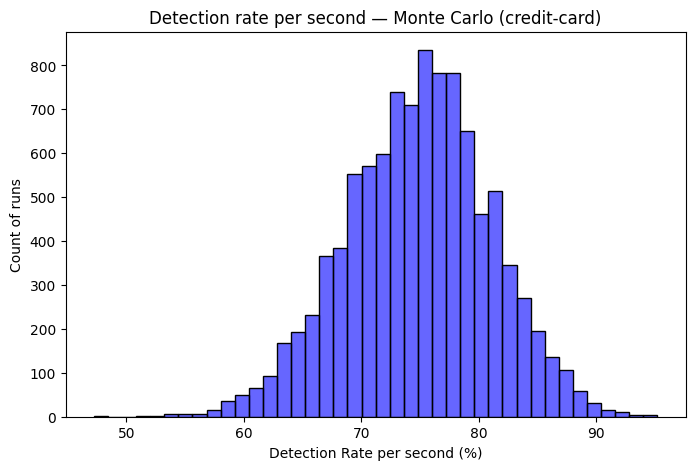

In [ ]:
#Plotting histogram
plt.figure(figsize=(8,5))
sns.histplot(plot_df["detection_pct"], bins=40, kde=False, color="blue", alpha=0.6)
plt.title(f"Detection rate per second — Monte Carlo ({domain_name})")
plt.xlabel("Detection Rate per second (%)")
plt.ylabel("Count of runs")
plt.show()


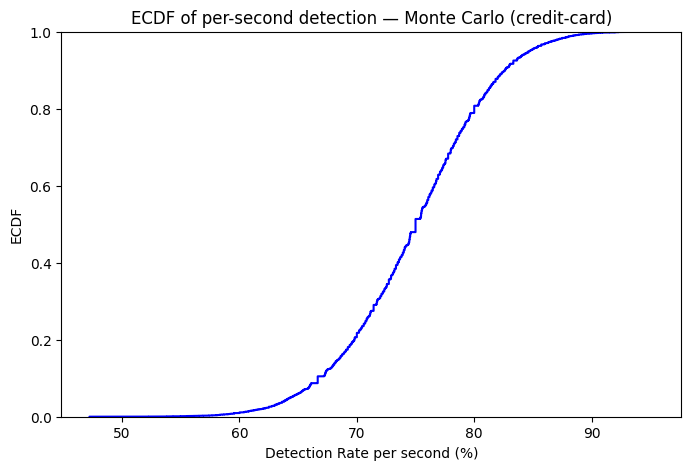

In [ ]:
#Plotting ECDF
plt.figure(figsize=(8,5))
sns.ecdfplot(plot_df["detection_pct"], color="blue", linewidth=1.5)
plt.title(f"ECDF of per-second detection — Monte Carlo ({domain_name})")
plt.xlabel("Detection Rate per second (%)")
plt.ylabel("ECDF")
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.metrics import roc_auc_score

# 1) Load model + test data
model_path = "/content/drive/My Drive/Thesis Project/cnn_baseline_model.h5"
cnn_baseline = load_model(model_path)

# If X_test / y_test are pandas objects:
X_test_np = X_test.values if hasattr(X_test, "values") else np.asarray(X_test)
y_test_np = y_test.values if hasattr(y_test, "values") else np.asarray(y_test)

# Ensure labels are {0,1} integers
y_test_np = y_test_np.astype(int)
assert set(np.unique(y_test_np)).issubset({0,1}), "y_test must be binary {0,1}"
assert X_test_np.shape[0] == y_test_np.shape[0]

# 2) Simulation settings
lambda_per_sec = 50.16
runs           = 10000
thr_cnn        = 0.50
rng            = np.random.default_rng(123)


In [ ]:
# 3) Probability helper
def predict_prob_keras(model, X_batch, batch_size=4096):
    """
    Returns p(y=1) for a batch using a Keras model.
    Works whether model outputs shape (n,1) or (n,).
    """
    p = model.predict(X_batch, batch_size=batch_size, verbose=0)
    p = np.asarray(p).reshape(-1)
    return p

In [ ]:
# 4) Windowed Monte Carlo simulator
def simulate_realtime_fullpool_keras(model, threshold, lambda_rate_per_sec, runs,
                                     X_pool, y_pool, window_secs=1):
    """
    Each run is a time window of length `window_secs`.
    We draw arrivals ~ Poisson(lambda_rate_per_sec * window_secs),
    sample that many rows with replacement from the test pool,
    score them, threshold to get yhat, and compute per-window metrics.
    """
    N = X_pool.shape[0]
    arrivals = rng.poisson(lam=lambda_rate_per_sec * window_secs, size=runs)

    TP = np.zeros(runs, dtype=np.int32)
    FP = np.zeros(runs, dtype=np.int32)
    TN = np.zeros(runs, dtype=np.int32)
    FN = np.zeros(runs, dtype=np.int32)

    precision = np.full(runs, np.nan, dtype=float)
    recall    = np.full(runs, np.nan, dtype=float)
    accuracy  = np.full(runs, np.nan, dtype=float)
    f1        = np.full(runs, np.nan, dtype=float)
    auc_vec   = np.full(runs, np.nan, dtype=float)

    for r in range(runs):
        F = arrivals[r]
        if F == 0:
            continue

        idx = rng.integers(0, N, size=F, dtype=np.int64)
        X_r = X_pool[idx]
        y_r = y_pool[idx]

        p_r = predict_prob_keras(model, X_r)
        yhat = (p_r >= threshold).astype(np.int32)

        tp = np.sum((yhat == 1) & (y_r == 1))
        fp = np.sum((yhat == 1) & (y_r == 0))
        tn = np.sum((yhat == 0) & (y_r == 0))
        fn = np.sum((yhat == 0) & (y_r == 1))

        TP[r], FP[r], TN[r], FN[r] = tp, fp, tn, fn

        denom_p = tp + fp
        denom_r = tp + fn
        if denom_p > 0:
            precision[r] = tp / denom_p
        if denom_r > 0:
            recall[r] = tp / denom_r

        accuracy[r] = (tp + tn) / F
        if not np.isnan(precision[r]) and not np.isnan(recall[r]) and (precision[r] + recall[r]) > 0:
            f1[r] = 2 * precision[r] * recall[r] / (precision[r] + recall[r])

        # AUC only if both classes present in the window
        if (y_r.min() == 0) and (y_r.max() == 1):
            try:
                auc_vec[r] = roc_auc_score(y_r, p_r)
            except Exception:
                pass

    mc_df = pd.DataFrame({
        "run": np.arange(1, runs+1, dtype=np.int32),
        "window_secs": window_secs,
        "arrivals": arrivals,
        "TP": TP, "FP": FP, "TN": TN, "FN": FN,
        "precision": precision, "recall": recall, "accuracy": accuracy, "f1": f1,
        "auc": auc_vec
    })

    # Summary table
    summary = {
        "runs": runs,
        "window_secs": window_secs,
        "runs_with_tx": int(np.sum(arrivals > 0)),
        "mean_TP": float(np.nanmean(TP)),
        "mean_FP": float(np.nanmean(FP)),
        "mean_TN": float(np.nanmean(TN)),
        "mean_FN": float(np.nanmean(FN)),
        "mean_precision": float(np.nanmean(precision)),
        "mean_recall": float(np.nanmean(recall)),
        "mean_accuracy": float(np.nanmean(accuracy)),
        "mean_f1": float(np.nanmean(f1)),
        "mean_auc": float(np.nanmean(auc_vec)),
        "median_auc": float(np.nanmedian(auc_vec)),
        "n_auc_runs": int(np.sum(~np.isnan(auc_vec))),
    }
    summary_df = pd.DataFrame([summary])
    return {"mc_df": mc_df, "summary": summary_df}

In [ ]:
#Run the CNN
res_cnn_1s  = simulate_realtime_fullpool_keras(
    model=cnn_baseline, threshold=thr_cnn, lambda_rate_per_sec=lambda_per_sec,
    runs=runs, X_pool=X_test_np, y_pool=y_test_np, window_secs=1
)
res_cnn_10s = simulate_realtime_fullpool_keras(
    model=cnn_baseline, threshold=thr_cnn, lambda_rate_per_sec=lambda_per_sec,
    runs=runs, X_pool=X_test_np, y_pool=y_test_np, window_secs=10
)

In [ ]:
#Compare summaries
summary_table = pd.concat([
    res_cnn_1s["summary"].assign(model="CNN (Keras)", time_unit="1 sec", threshold=thr_cnn),
    res_cnn_10s["summary"].assign(model="CNN (Keras)", time_unit="10 sec", threshold=thr_cnn),
], ignore_index=True)[[
    "model","time_unit",
    "mean_accuracy","mean_precision","mean_recall","mean_f1",
    "mean_auc"
]]

print(summary_table.to_string(index=False))

      model time_unit  mean_accuracy  mean_precision  mean_recall  mean_f1  mean_auc
CNN (Keras)     1 sec       0.999273        0.794689     0.755843  0.99137  0.967884
CNN (Keras)    10 sec       0.999245        0.790392     0.751993  0.89846  0.964463


SHAP ANALYSIS

In [ ]:
feature_names = X_train.columns.tolist()

background = X_train_cnn[np.random.choice(X_train_cnn.shape[0], 200, replace=False)]
X_explain = X_test_cnn[np.random.choice(X_test_cnn.shape[0], 100, replace=False)]

# SHAP KernelExplainer
background_flat = background.reshape(background.shape[0], -1)
X_explain_flat = X_explain.reshape(X_explain.shape[0], -1)

#model prediction wrapper
def cnn_predict(x_flat):
    x_reshaped = x_flat.reshape((-1, X_train_cnn.shape[1], 1))
    return cnn_baseline.predict(x_reshaped).flatten()

#SHAP explainer
explainer = shap.KernelExplainer(cnn_predict, background_flat)

#Computing SHAP values
shap_values = explainer.shap_values(X_explain_flat)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
13163/13163 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
13163/13163 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
13163/13163 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
13163/13163 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
13163/13163 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
13163/13163 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
13163/13163 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
13163/13163 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
13163/13163 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
13163/13163 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
13163/13163 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
13163/13163 ━━━━━━━━━━━━━━━━━━━━ 23s 2

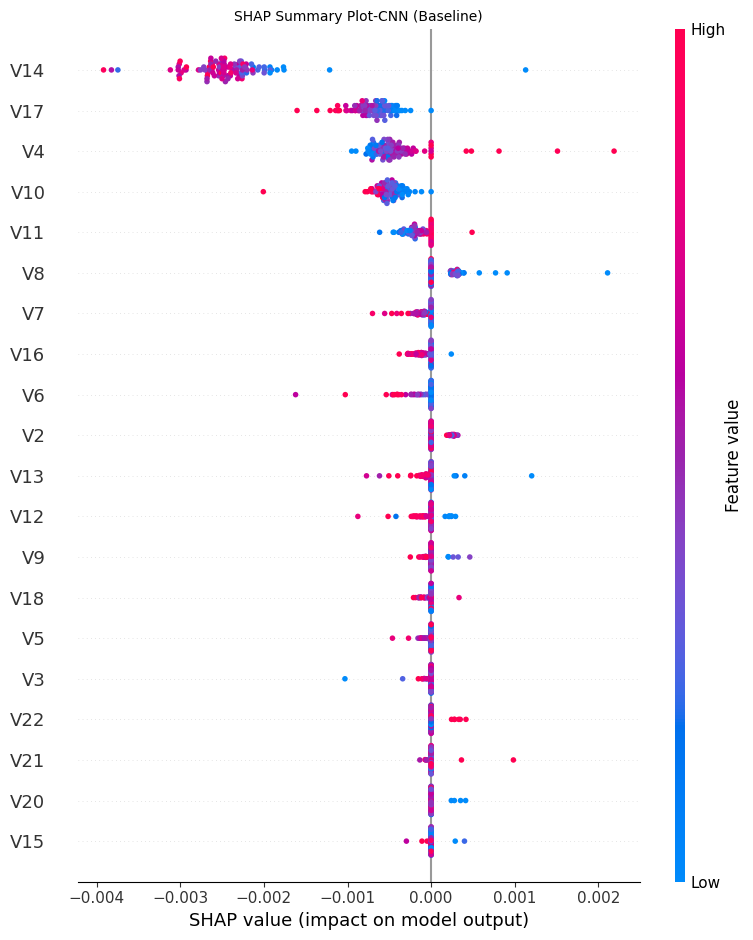

<Figure size 640x480 with 0 Axes>

In [ ]:
# --- 7. Plot with real feature names ---
plt.figure(figsize=(5, 5))  # Width=10, Height=5 inches
shap.summary_plot(
    shap_values,
    X_explain_flat,
    feature_names=feature_names,
    plot_type="dot",
    show=False  # Prevent SHAP from auto-displaying
)
plt.title("SHAP Summary Plot-CNN (Baseline)", fontsize=10)
plt.tight_layout()
plt.show()

 #Save the figure
plt.savefig("SHAP Summary Plot-CNN (Baseline).png", dpi=300, bbox_inches='tight')


SMOTE + CNN

In [ ]:
# Applying SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
X_train_smote_cnn = X_train_smote.values.reshape((X_train_smote.shape[0], X_train_smote.shape[1], 1))

In [ ]:
# Define early stopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=1
)

#CNN architecture for SMOTE
cnn_smote = Sequential([
    # Block 1
    Conv1D(32, 3, activation='relu', padding='same', input_shape=(X_train_smote_cnn.shape[1], 1)),
    BatchNormalization(),
    Conv1D(64, 3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    # Block 2
    Conv1D(128, 3, activation='relu', padding='same'),
    BatchNormalization(),
    Conv1D(128, 3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])



/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compiling model with same optimizer and metrics
cnn_smote.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall')]
)


# Training model
cnn_smote.fit(
    X_train_smote_cnn,
    y_train_smote,
    epochs=30,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)


# Predictions
y_pred_probs_smote = cnn_smote.predict(X_test_cnn).flatten()
y_pred_smote = (y_pred_probs_smote > 0.5).astype(int)

# Evaluation
cm_smote = confusion_matrix(y_test, y_pred_smote)
roc_smote = roc_auc_score(y_test, y_pred_probs_smote)

print("Confusion Matrix:")
print(cm_smote)
print(f"AUC: {roc_smote:.4f}")

Epoch 1/30
4976/4976 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step - accuracy: 0.9534 - loss: 0.1246 - precision: 0.9528 - recall: 0.9231 - val_accuracy: 0.9996 - val_loss: 0.0055 - val_precision: 1.0000 - val_recall: 0.9996
Epoch 2/30
4976/4976 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9894 - loss: 0.0294 - precision: 0.9852 - recall: 0.9866 - val_accuracy: 0.9997 - val_loss: 0.0023 - val_precision: 1.0000 - val_recall: 0.9997
Epoch 3/30
4976/4976 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9940 - loss: 0.0180 - precision: 0.9906 - recall: 0.9935 - val_accuracy: 1.0000 - val_loss: 0.0013 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 4/30
4976/4976 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9960 - loss: 0.0122 - precision: 0.9937 - recall: 0.9957 - val_accuracy: 1.0000 - val_loss: 7.4465e-04 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 5/30
4976/4976 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9970 - loss: 0.0094 - precision: 0.9950 - recall: 0.9969 - val_accuracy: 1.

SHAP ANALYSIS FOR CNN SMOTE

In [ ]:
# Extract feature names
feature_names = X_train.columns.tolist()

# Preparing background and test data
background = X_train_smote_cnn[np.random.choice(X_train_smote_cnn.shape[0], 100, replace=False)]
X_explain = X_test_cnn[np.random.choice(X_test_cnn.shape[0], 50, replace=False)]

#Flattening for SHAP KernelExplainer
background_flat = background.reshape(background.shape[0], -1)
X_explain_flat = X_explain.reshape(X_explain.shape[0], -1)

#Defining prediction wrapper for cnn_smote
def cnn_smote_predict(x_flat):
    x_reshaped = x_flat.reshape((-1, X_train_smote_cnn.shape[1], 1))
    return cnn_smote.predict(x_reshaped).flatten()

#Creating SHAP explainer
explainer_smote = shap.KernelExplainer(cnn_smote_predict, background_flat)

#Computing SHAP values
shap_values_smote = explainer_smote.shap_values(X_explain_flat, nsamples="auto")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


  0%|          | 0/50 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
6582/6582 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
6582/6582 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
6582/6582 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
6582/6582 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
6582/6582 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
6582/6582 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
6582/6582 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
6582/6582 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
6582/6582 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
6582/6582 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
6582/6582 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
6582/6582 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━

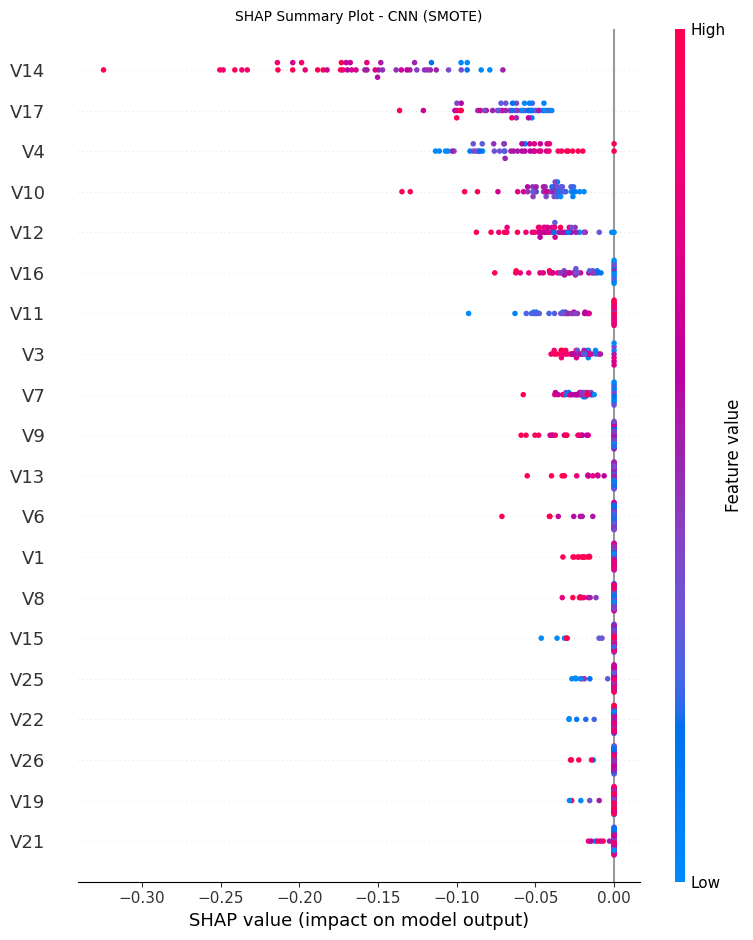

In [ ]:
#SHAP Summary Plot
plt.figure(figsize=(6, 4))
shap.summary_plot(
    shap_values_smote,
    X_explain_flat,
    feature_names=feature_names,
    plot_type="dot",
    show=False
)
plt.title("SHAP Summary Plot - CNN (SMOTE)", fontsize=10)
plt.tight_layout()
plt.show()

ADASYN + CNN

In [ ]:
# Applying ADASYN
adas = ADASYN(random_state=42)
X_train_adas, y_train_adas = adas.fit_resample(X_train, y_train)
X_train_adas_cnn = X_train_adas.values.reshape((X_train_adas.shape[0], X_train_adas.shape[1], 1))

In [ ]:
# Early stopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=1
)

#CNN architecture for ADASYN
cnn_adas = Sequential([
    # Block 1
    Conv1D(32, 3, activation='relu', padding='same', input_shape=(X_train_adas_cnn.shape[1], 1)),
    BatchNormalization(),
    Conv1D(64, 3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    # Block 2
    Conv1D(128, 3, activation='relu', padding='same'),
    BatchNormalization(),
    Conv1D(128, 3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compiling model
cnn_adas.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall')]
)


cnn_adas.fit(
    X_train_adas_cnn,
    y_train_adas,
    epochs=30,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)


# Predictions
y_pred_probs_adas = cnn_adas.predict(X_test_cnn).flatten()
y_pred_adas = (y_pred_probs_adas > 0.5).astype(int)

# Evaluation
cm_adasyn = confusion_matrix(y_test, y_pred_adas)
roc_adasyn = roc_auc_score(y_test, y_pred_probs_adas)

print("Confusion Matrix:")
print(cm_adasyn)
print(f"AUC: {roc_adasyn:.4f}")

Epoch 1/30
4976/4976 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step - accuracy: 0.9290 - loss: 0.1717 - precision: 0.9116 - recall: 0.8945 - val_accuracy: 0.7311 - val_loss: 1.9052 - val_precision: 1.0000 - val_recall: 0.7311
Epoch 2/30
4976/4976 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9930 - loss: 0.0234 - precision: 0.9878 - recall: 0.9937 - val_accuracy: 0.8025 - val_loss: 1.8745 - val_precision: 1.0000 - val_recall: 0.8025
Epoch 3/30
4976/4976 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9962 - loss: 0.0138 - precision: 0.9930 - recall: 0.9968 - val_accuracy: 0.7791 - val_loss: 2.2423 - val_precision: 1.0000 - val_recall: 0.7791
Epoch 4/30
4976/4976 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9974 - loss: 0.0098 - precision: 0.9950 - recall: 0.9981 - val_accuracy: 0.7824 - val_loss: 2.3402 - val_precision: 1.0000 - val_recall: 0.7824
Epoch 5/30
4976/4976 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9980 - loss: 0.0080 - precision: 0.9962 - recall: 0.9986 - val_accuracy: 0.7857

SHAP ANALYSIS FOR ADASYN

In [ ]:
# Extract original feature names
feature_names = X_train.columns.tolist()  # Ensure X_train is the unreshaped DataFrame

# Sample background and test data
background = X_train_adas_cnn[np.random.choice(X_train_adas_cnn.shape[0], 100, replace=False)]
X_explain = X_test_cnn[np.random.choice(X_test_cnn.shape[0], 50, replace=False)]

# Flatten data for SHAP
background_flat = background.reshape(background.shape[0], -1)
X_explain_flat = X_explain.reshape(X_explain.shape[0], -1)

#Prediction wrapper for CNN ADASYN model
def cnn_adas_predict(x_flat):
    x_reshaped = x_flat.reshape((-1, X_train_adas_cnn.shape[1], 1))
    return cnn_adas.predict(x_reshaped).flatten()

#Create SHAP KernelExplainer
explainer_adas = shap.KernelExplainer(cnn_adas_predict, background_flat)

#Compute SHAP values
shap_values_adas = explainer_adas.shap_values(X_explain_flat, nsamples="auto")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


  0%|          | 0/50 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
6582/6582 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
6582/6582 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
6582/6582 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
6582/6582 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
6582/6582 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
6582/6582 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
6582/6582 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
6582/6582 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
6582/6582 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
6582/6582 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
6582/6582 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
6582/6582 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━

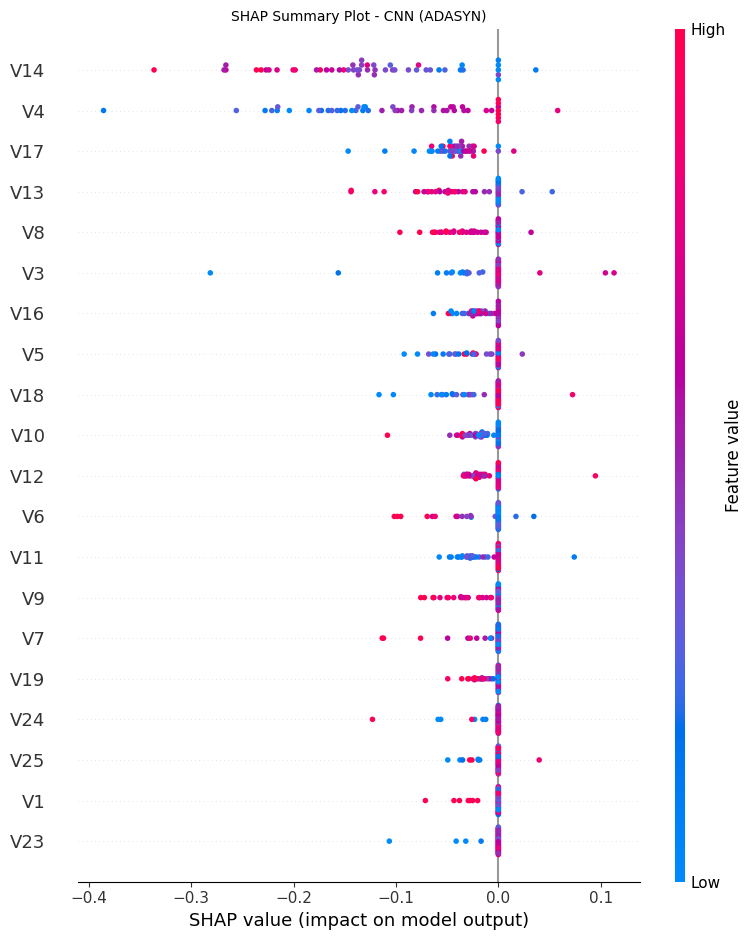

In [ ]:
#SHAP Summary Plot (Beeswarm)
plt.figure(figsize=(6, 4))
shap.summary_plot(
    shap_values_adas,
    X_explain_flat,
    feature_names=feature_names,
    plot_type="dot",
    show=False
)
plt.title("SHAP Summary Plot - CNN (ADASYN)", fontsize=10)
plt.tight_layout()
plt.show()

Cost-Sensitive CNN

In [ ]:
# Computing class weights
class_weights_array = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {0: class_weights_array[0], 1: class_weights_array[1]}

In [ ]:
# Early stopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=1
)

#CNN architecture for Cost-Sensitive
cnn_cost = Sequential([
    # Block 1
    Conv1D(32, 3, activation='relu', padding='same', input_shape=(X_train_cnn.shape[1], 1)),
    BatchNormalization(),
    Conv1D(64, 3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    # Block 2
    Conv1D(128, 3, activation='relu', padding='same'),
    BatchNormalization(),
    Conv1D(128, 3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compiling with class weights
cnn_cost.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall')]
)


# Training with class weights and validation
cnn_cost.fit(
    X_train_cnn,
    y_train,
    epochs=30,
    batch_size=64,
    class_weight=class_weights_dict,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)


# Predictions
y_pred_probs_cost = cnn_cost.predict(X_test_cnn).flatten()
y_pred_cost = (y_pred_probs_cost > 0.5).astype(int)

# Evaluation
cm_cost = confusion_matrix(y_test, y_pred_cost)
roc_cost = roc_auc_score(y_test, y_pred_probs_cost)

print("Confusion Matrix:")
print(cm_cost)
print(f"AUC: {roc_cost:.4f}")

Epoch 1/30
2492/2492 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.9227 - loss: 0.9363 - precision: 0.0194 - recall: 0.7382 - val_accuracy: 0.9245 - val_loss: 0.2053 - val_precision: 0.0138 - val_recall: 0.9130
Epoch 2/30
2492/2492 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9387 - loss: 0.2731 - precision: 0.0238 - recall: 0.8725 - val_accuracy: 0.9303 - val_loss: 0.1969 - val_precision: 0.0149 - val_recall: 0.9130
Epoch 3/30
2492/2492 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9513 - loss: 0.1859 - precision: 0.0315 - recall: 0.9274 - val_accuracy: 0.9527 - val_loss: 0.1363 - val_precision: 0.0218 - val_recall: 0.9130
Epoch 4/30
2492/2492 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9546 - loss: 0.2168 - precision: 0.0367 - recall: 0.9333 - val_accuracy: 0.9584 - val_loss: 0.1269 - val_precision: 0.0248 - val_recall: 0.9130
Epoch 5/30
2492/2492 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9567 - loss: 0.1596 - precision: 0.0378 - recall: 0.9095 - val_accuracy: 0.9499 - v

SHAP ANALYSIS FOR Cost-Sensitive¶

In [ ]:
#Extract original feature names
feature_names = X_train.columns.tolist()

#Sample background and test data
background = X_train_cnn[np.random.choice(X_train_cnn.shape[0], 100, replace=False)]
X_explain = X_test_cnn[np.random.choice(X_test_cnn.shape[0], 50, replace=False)]

#Flatten data for KernelExplainer
background_flat = background.reshape(background.shape[0], -1)
X_explain_flat = X_explain.reshape(X_explain.shape[0], -1)

#Define prediction wrapper for cost-sensitive CNN model
def cnn_cost_predict(x_flat):
    x_reshaped = x_flat.reshape((-1, X_train_cnn.shape[1], 1))
    return cnn_cost.predict(x_reshaped).flatten()

#Create SHAP KernelExplainer
explainer_cost = shap.KernelExplainer(cnn_cost_predict, background_flat)

#Compute SHAP values
shap_values_cost = explainer_cost.shap_values(X_explain_flat, nsamples="auto")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


  0%|          | 0/50 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
6582/6582 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
6582/6582 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
6582/6582 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
6582/6582 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
6582/6582 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
6582/6582 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
6582/6582 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
6582/6582 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
6582/6582 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
6582/6582 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
6582/6582 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
6582/6582 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━

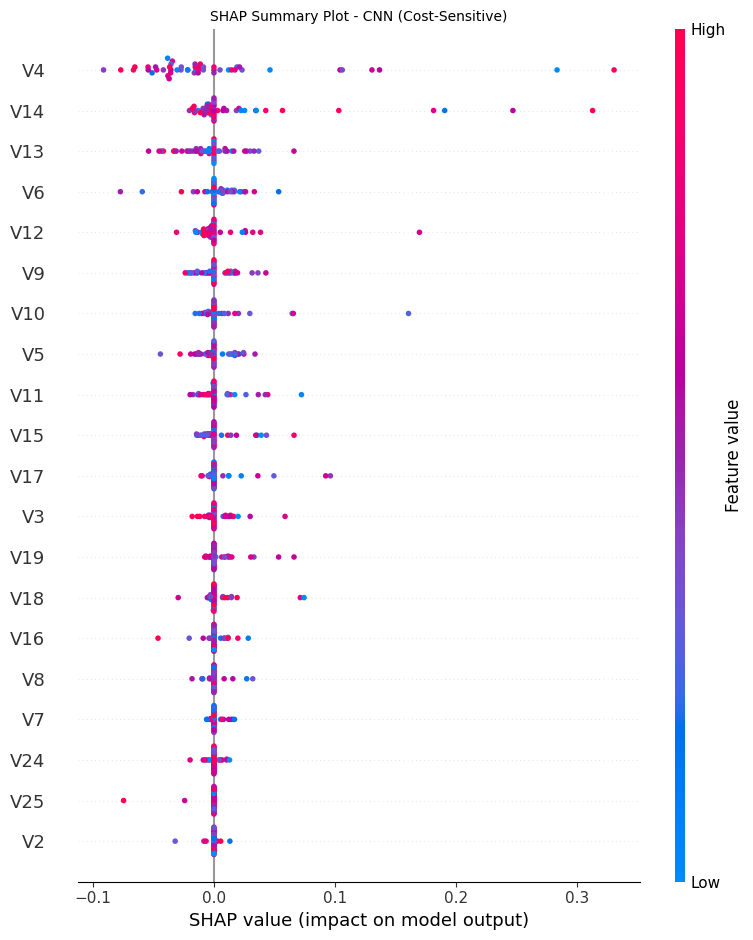

<Figure size 640x480 with 0 Axes>

In [ ]:
#SHAP Plot
plt.figure(figsize=(4, 10))
shap.summary_plot(
    shap_values_cost,
    X_explain_flat,
    feature_names=feature_names,
    plot_type="dot",
    show=False
)
plt.title("SHAP Summary Plot - CNN (Cost-Sensitive)", fontsize=10)
plt.tight_layout()
plt.show()


Plot ROC Curves for CNN¶

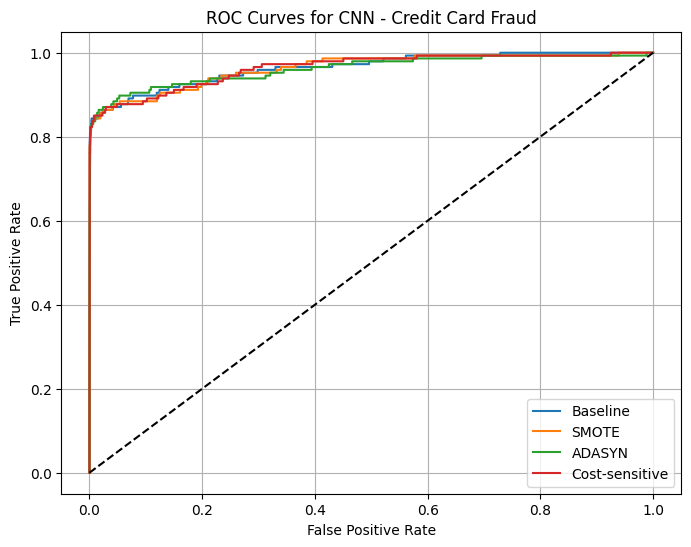

In [ ]:
fpr_base, tpr_base, _ = roc_curve(y_test, y_pred_probs_baseline)
fpr_smote, tpr_smote, _ = roc_curve(y_test, y_pred_probs_smote)
fpr_adas, tpr_adas, _ = roc_curve(y_test, y_pred_probs_adas)
fpr_cost, tpr_cost, _ = roc_curve(y_test, y_pred_probs_cost)

plt.figure(figsize=(8,6))
plt.plot(fpr_base, tpr_base, label="Baseline")
plt.plot(fpr_smote, tpr_smote, label="SMOTE")
plt.plot(fpr_adas, tpr_adas, label="ADASYN")
plt.plot(fpr_cost, tpr_cost, label="Cost-sensitive")
plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curves for CNN - Credit Card Fraud")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

Evaluation Table

In [ ]:
#Model evaluation table
results_cnn = pd.DataFrame({
    "Method": ["Baseline", "SMOTE", "ADASYN", "Cost-sensitive"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_baseline),
        accuracy_score(y_test, y_pred_smote),
        accuracy_score(y_test, y_pred_adas),
        accuracy_score(y_test, y_pred_cost)
    ],
    "Precision": [
        precision_score(y_test, y_pred_baseline),
        precision_score(y_test, y_pred_smote),
        precision_score(y_test, y_pred_adas),
        precision_score(y_test, y_pred_cost)
    ],
    "Recall": [
        recall_score(y_test, y_pred_baseline),
        recall_score(y_test, y_pred_smote),
        recall_score(y_test, y_pred_adas),
        recall_score(y_test, y_pred_cost)
    ],
    "F1": [
        f1_score(y_test, y_pred_baseline),
        f1_score(y_test, y_pred_smote),
        f1_score(y_test, y_pred_adas),
        f1_score(y_test, y_pred_cost)
    ],
    "AUC": [roc_baseline, roc_smote, roc_adasyn, roc_cost]
})

# View final table
print(results_cnn)


           Method  Accuracy  Precision    Recall        F1       AUC
0        Baseline  0.999228   0.791367  0.748299  0.769231  0.964266
1           SMOTE  0.997530   0.394040  0.809524  0.530067  0.963145
2          ADASYN  0.994440   0.213287  0.829932  0.339360  0.961473
3  Cost-sensitive  0.960440   0.036687  0.870748  0.070407  0.963692


# **LSTM MODELS**

In [ ]:
# Reshaping input
X_train_lstm = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm  = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

Hyper-parameter Tuning

In [ ]:
# Hyper-parameter Tuning

def build_lstm_model(units, dropout_rate, dense_units, learning_rate):
    inter_dropout = max(min(dropout_rate, 0.8), 0.0)
    head_dropout  = max(min(dropout_rate + 0.1, 0.8), 0.0)

    half_units = max(units // 2, 32)

    model = Sequential([
        #LSTM Block 1
        LSTM(units, return_sequences=True, dropout=inter_dropout, recurrent_dropout=0.1,
             input_shape=(X_train_lstm.shape[1], 1)),
        BatchNormalization(),

        #LSTM Block 2
        LSTM(units, return_sequences=True, dropout=inter_dropout, recurrent_dropout=0.1),
        BatchNormalization(),

        #LSTM Block 3 (final, no return_sequences)
        LSTM(half_units, return_sequences=False, dropout=inter_dropout, recurrent_dropout=0.1),
        BatchNormalization(),

        # Dense head (2 layers)
        Dense(dense_units * 2, activation='relu'),
        Dropout(head_dropout),
        Dense(dense_units, activation='relu'),
        Dropout(inter_dropout),

        # Output
        Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# Grid definition
param_grid_lstm = {
    'units': [32, 64, 128, 256],
    'dropout_rate': [0.1, 0.2, 0.3, 0.4],
    'dense_units': [32,64, 128,256],
    'learning_rate': [0.0001,0.0002,0.0003,0.0004,0.0005]
}

results_lstm = []

for params in itertools.product(*param_grid_lstm.values()):
    current_params = dict(zip(param_grid_lstm.keys(), params))
    print(f"Testing: {current_params}")

    model = build_lstm_model(**current_params)
    history = model.fit(
        X_train_lstm,
        y_train,
        validation_split=0.2,
        epochs=10,
        batch_size=32,
        verbose=0,
        callbacks=[early_stop]
    )

    y_pred_probs = model.predict(X_test_lstm, verbose=0).flatten()
    y_pred = (y_pred_probs > 0.5).astype(int)

    acc = accuracy_score(y_test, y_pred)
    results_lstm.append((current_params, acc))
    print(f"Accuracy: {acc:.4f}")


In [ ]:
best_params_lstm, best_score_lstm = max(results_lstm, key=lambda x: x[1])
print("\nBest Parameters for LSTM:")
print(best_params_lstm)
print(f"Best Accuracy: {best_score_lstm:.4f}")

LSTM BASELINE¶

In [ ]:
# Early stopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=1
)

# LSTM model
lstm_baseline = Sequential([
    # LSTM Block 1
    LSTM(128, input_shape=(X_train_lstm.shape[1], 1),
         return_sequences=True, dropout=0.3, recurrent_dropout=0.1),
    BatchNormalization(),

    # LSTM Block 2
    LSTM(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.1),
    BatchNormalization(),

    # LSTM Block 3
    LSTM(64, return_sequences=False, dropout=0.3, recurrent_dropout=0.1),
    BatchNormalization(),

    # Dense head
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

In [ ]:
# Compiling
lstm_baseline.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall')]
)

# Fitting model
lstm_baseline.fit(
    X_train_lstm,
    y_train,
    epochs=30,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)


# Predicting and evaluation
y_pred_probs_baseline_lstm = lstm_baseline.predict(X_test_lstm).flatten()
y_pred_baseline_lstm = (y_pred_probs_baseline_lstm > 0.5).astype(int)

# Metrics
cm_baseline_lstm = confusion_matrix(y_test, y_pred_baseline_lstm)
roc_baseline_lstm = roc_auc_score(y_test, y_pred_probs_baseline_lstm)

# Results
print("Confusion Matrix:")
print(cm_baseline_lstm)
print(f"AUC: {roc_baseline_lstm:.4f}")

Epoch 1/30
2492/2492 ━━━━━━━━━━━━━━━━━━━━ 296s 115ms/step - accuracy: 0.9962 - loss: 0.0196 - precision: 0.1383 - recall: 0.0567 - val_accuracy: 0.9989 - val_loss: 0.0092 - val_precision: 1.0000 - val_recall: 0.0870
Epoch 2/30
2492/2492 ━━━━━━━━━━━━━━━━━━━━ 286s 115ms/step - accuracy: 0.9986 - loss: 0.0073 - precision: 0.6974 - recall: 0.4618 - val_accuracy: 0.9995 - val_loss: 0.0034 - val_precision: 0.9310 - val_recall: 0.5870
Epoch 3/30
2492/2492 ━━━━━━━━━━━━━━━━━━━━ 285s 115ms/step - accuracy: 0.9987 - loss: 0.0071 - precision: 0.7582 - recall: 0.4956 - val_accuracy: 0.9996 - val_loss: 0.0030 - val_precision: 0.9677 - val_recall: 0.6522
Epoch 4/30
2492/2492 ━━━━━━━━━━━━━━━━━━━━ 285s 114ms/step - accuracy: 0.9990 - loss: 0.0062 - precision: 0.8363 - recall: 0.5764 - val_accuracy: 0.9994 - val_loss: 0.0033 - val_precision: 0.9600 - val_recall: 0.5217
Epoch 5/30
2492/2492 ━━━━━━━━━━━━━━━━━━━━ 286s 115ms/step - accuracy: 0.9991 - loss: 0.0054 - precision: 0.8338 - recall: 0.6643 - val_a

SMOTE + LSTM

In [ ]:
X_train_smote_lstm = X_train_smote.values.reshape((X_train_smote.shape[0], X_train_smote.shape[1], 1))

In [ ]:
#Early stopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=1
)

lstm_smote = Sequential([
    # LSTM Block 1
    LSTM(128, input_shape=(X_train_smote_lstm.shape[1], 1),
         return_sequences=True, dropout=0.3, recurrent_dropout=0.1),
    BatchNormalization(),

    # LSTM Block 2
    LSTM(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.1),
    BatchNormalization(),

    # LSTM Block 3
    LSTM(64, return_sequences=False, dropout=0.3, recurrent_dropout=0.1),
    BatchNormalization(),

    # Dense head
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compile with advanced metrics
lstm_smote.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall')]
)


lstm_smote.fit(
    X_train_smote_lstm,
    y_train_smote,
    epochs=30,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# Predicting and evaluation
y_pred_probs_smote_lstm = lstm_smote.predict(X_test_lstm).flatten()
y_pred_smote_lstm = (y_pred_probs_smote_lstm > 0.5).astype(int)

cm_smote_lstm = confusion_matrix(y_test, y_pred_smote_lstm)
roc_smote_lstm = roc_auc_score(y_test, y_pred_probs_smote_lstm)

# Results
print("Confusion Matrix:")
print(cm_smote_lstm)
print(f"AUC: {roc_smote_lstm:.4f}")

Epoch 1/30
9951/9951 ━━━━━━━━━━━━━━━━━━━━ 2562s 256ms/step - accuracy: 0.9186 - loss: 0.2365 - precision: 0.9612 - recall: 0.8130 - val_accuracy: 0.9327 - val_loss: 0.1574 - val_precision: 1.0000 - val_recall: 0.9327
Epoch 2/30
9951/9951 ━━━━━━━━━━━━━━━━━━━━ 2511s 252ms/step - accuracy: 0.9608 - loss: 0.1082 - precision: 0.9715 - recall: 0.9224 - val_accuracy: 0.9848 - val_loss: 0.0406 - val_precision: 1.0000 - val_recall: 0.9848
Epoch 3/30
9951/9951 ━━━━━━━━━━━━━━━━━━━━ 2594s 261ms/step - accuracy: 0.9762 - loss: 0.0643 - precision: 0.9774 - recall: 0.9587 - val_accuracy: 0.9942 - val_loss: 0.0167 - val_precision: 1.0000 - val_recall: 0.9942
Epoch 4/30
9951/9951 ━━━━━━━━━━━━━━━━━━━━ 2463s 248ms/step - accuracy: 0.9827 - loss: 0.0465 - precision: 0.9820 - recall: 0.9720 - val_accuracy: 0.9783 - val_loss: 0.1542 - val_precision: 1.0000 - val_recall: 0.9783
Epoch 5/30
9951/9951 ━━━━━━━━━━━━━━━━━━━━ 2456s 247ms/step - accuracy: 0.9873 - loss: 0.0347 - precision: 0.9855 - recall: 0.9809 - 

KeyboardInterrupt: 

ADASYN + LSTM

In [ ]:
X_train_adas_lstm = X_train_adas.values.reshape((X_train_adas.shape[0], X_train_adas.shape[1], 1))

# Early stopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=1
)

# LSTM architecture ADASYN
lstm_adas = Sequential([
    # LSTM Block 1
    LSTM(128, input_shape=(X_train_adas_lstm.shape[1], 1),
         return_sequences=True, dropout=0.3, recurrent_dropout=0.1),
    BatchNormalization(),

    # LSTM Block 2
    LSTM(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.1),
    BatchNormalization(),

    # LSTM Block 3
    LSTM(64, return_sequences=False, dropout=0.3, recurrent_dropout=0.1),
    BatchNormalization(),

    # Dense head
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

In [ ]:
# Compiling
lstm_adas.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall')]
)


lstm_adas.fit(
    X_train_adas_lstm,
    y_train_adas,
    epochs=30,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1

)


# Predicting and evaluation
y_pred_probs_adas_lstm = lstm_adas.predict(X_test_lstm).flatten()
y_pred_adas_lstm = (y_pred_probs_adas_lstm > 0.5).astype(int)

cm_adasyn_lstm = confusion_matrix(y_test, y_pred_adas_lstm)
roc_adasyn_lstm = roc_auc_score(y_test, y_pred_probs_adas_lstm)

#Results
print("Confusion Matrix:")
print(cm_adasyn_lstm)
print(f"AUC: {roc_adasyn_lstm:.4f}")

Cost-Sensitive LSTM

In [ ]:
class_weights_array = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {0: class_weights_array[0], 1: class_weights_array[1]}

In [ ]:
# Early stopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=1
)

# LSTM architecture Cost-Sensitive
lstm_cost = Sequential([
    # LSTM Block 1
    LSTM(128, input_shape=(X_train_lstm.shape[1], 1),
         return_sequences=True, dropout=0.3, recurrent_dropout=0.1),
    BatchNormalization(),

    # LSTM Block 2
    LSTM(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.1),
    BatchNormalization(),

    # LSTM Block 3
    LSTM(64, return_sequences=False, dropout=0.3, recurrent_dropout=0.1),
    BatchNormalization(),

    # Dense head
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

In [ ]:
# Compiling model
lstm_cost.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall')]
)


# Training
lstm_cost.fit(
    X_train_lstm,
    y_train,
    epochs=30,
    batch_size=64,
    class_weight=class_weights_dict,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)


# Predicting and evaluation
y_pred_probs_cost_lstm = lstm_cost.predict(X_test_lstm).flatten()
y_pred_cost_lstm = (y_pred_probs_cost_lstm > 0.5).astype(int)

cm_cost_lstm = confusion_matrix(y_test, y_pred_cost_lstm)
roc_cost_lstm = roc_auc_score(y_test, y_pred_probs_cost_lstm)

# Results
print("Confusion Matrix:")
print(cm_cost_lstm)
print(f"AUC: {roc_cost_lstm:.4f}")

Plot ROC Curves for LSTM¶

In [ ]:
fpr_base_lstm, tpr_base_lstm, _ = roc_curve(y_test, y_pred_probs_baseline_lstm)
fpr_smote_lstm, tpr_smote_lstm, _ = roc_curve(y_test, y_pred_probs_smote_lstm)
fpr_adas_lstm, tpr_adas_lstm, _ = roc_curve(y_test, y_pred_probs_adas_lstm)
fpr_cost_lstm, tpr_cost_lstm, _ = roc_curve(y_test, y_pred_probs_cost_lstm)

plt.figure(figsize=(8,6))
plt.plot(fpr_base_lstm, tpr_base_lstm, label="Baseline")
plt.plot(fpr_smote_lstm, tpr_smote_lstm, label="SMOTE")
plt.plot(fpr_adas_lstm, tpr_adas_lstm, label="ADASYN")
plt.plot(fpr_cost_lstm, tpr_cost_lstm, label="Cost-sensitive")
plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curves for LSTM - Credit Card Fraud")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

Model Metrics Comparison Table

In [ ]:
results_lstm = pd.DataFrame({
    "Method": ["Baseline", "SMOTE", "ADASYN", "Cost-sensitive"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_baseline_lstm),
        accuracy_score(y_test, y_pred_smote_lstm),
        accuracy_score(y_test, y_pred_adas_lstm),
        accuracy_score(y_test, y_pred_cost_lstm)
    ],
    "Precision": [
        precision_score(y_test, y_pred_baseline_lstm),
        precision_score(y_test, y_pred_smote_lstm),
        precision_score(y_test, y_pred_adas_lstm),
        precision_score(y_test, y_pred_cost_lstm)
    ],
    "Recall": [
        recall_score(y_test, y_pred_baseline_lstm),
        recall_score(y_test, y_pred_smote_lstm),
        recall_score(y_test, y_pred_adas_lstm),
        recall_score(y_test, y_pred_cost_lstm)
    ],
    "F1": [
        f1_score(y_test, y_pred_baseline_lstm),
        f1_score(y_test, y_pred_smote_lstm),
        f1_score(y_test, y_pred_adas_lstm),
        f1_score(y_test, y_pred_cost_lstm)
    ],
    "AUC": [
        roc_baseline_lstm,
        roc_smote_lstm,
        roc_adasyn_lstm,
        roc_cost_lstm
    ]
})

print(results_lstm)

# HYBRID MODEL(CNN+LSTM)

In [ ]:
# Reshaping input
X_train_cnnlstm = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnnlstm  = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

Hyper-Parameter Tuning

In [ ]:
def build_cnn_lstm_model(filters, kernel_size, lstm_units, dropout_rate, dense_units, learning_rate):

    block_dropout = min(max(dropout_rate, 0.0), 0.8)
    head_dropout  = min(max(dropout_rate + 0.1, 0.0), 0.8)
    lstm_units_2  = max(lstm_units // 2, 32)

    model = Sequential([
        # Conv Block 1
        Conv1D(filters=filters, kernel_size=kernel_size, activation='relu',
               padding='same', input_shape=(X_train_cnnlstm.shape[1], 1)),
        BatchNormalization(),
        Conv1D(filters=filters * 2, kernel_size=kernel_size, activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling1D(pool_size=2),
        Dropout(block_dropout),

        # Conv Block 2
        Conv1D(filters=filters * 4, kernel_size=kernel_size, activation='relu', padding='same'),
        BatchNormalization(),
        Conv1D(filters=filters * 4, kernel_size=kernel_size, activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling1D(pool_size=2),
        Dropout(block_dropout),

        # LSTM stack
        LSTM(lstm_units, return_sequences=True, dropout=block_dropout, recurrent_dropout=0.1),
        BatchNormalization(),
        LSTM(lstm_units_2, return_sequences=False, dropout=block_dropout, recurrent_dropout=0.1),
        BatchNormalization(),

        # Dense head
        Dense(dense_units, activation='relu'),
        Dropout(head_dropout),
        Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# Keeping search space narrow for efficiency
param_grid_hybrid = {
    'filters': [32, 64, 128],
    'kernel_size': [3, 4, 5],
    'lstm_units': [32, 64, 128],
    'dropout_rate': [0.1, 0.2, 0.3, 0.4],
    'dense_units': [32, 64, 128, 256],
    'learning_rate': [0.0001,0.0002, 0.0003, 0.0004,0.0005]
}

results_hybrid = []

for params in itertools.product(*param_grid_hybrid.values()):
    current_params = dict(zip(param_grid_hybrid.keys(), params))
    print(f"Testing: {current_params}")

    model = build_cnn_lstm_model(**current_params)
    history = model.fit(
        X_train_cnnlstm,
        y_train,
        validation_split=0.2,
        epochs=30,
        batch_size=32,
        verbose=0,
        callbacks=[early_stop]
    )

    y_pred_probs = model.predict(X_test_cnnlstm, verbose=0).flatten()
    y_pred = (y_pred_probs > 0.5).astype(int)

    acc = accuracy_score(y_test, y_pred)
    results_hybrid.append((current_params, acc))
    print(f"Accuracy: {acc:.4f}")

best_params_hybrid, best_score_hybrid = max(results_hybrid, key=lambda x: x[1])
print("\nBest Parameters for CNN+LSTM:")
print(best_params_hybrid)
print(f"Best Accuracy: {best_score_hybrid:.4f}")

Hybrid (CNN + LSTM) Baseline

In [ ]:
# Early stopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=1
)

# CNN+LSTM model
cnn_lstm_baseline = Sequential([
    # Conv Block 1
    Conv1D(32, 3, activation='relu', padding='same', input_shape=(X_train_cnnlstm.shape[1], 1)),
    BatchNormalization(),
    Conv1D(64, 3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    # Conv Block 2
    Conv1D(128, 3, activation='relu', padding='same'),
    BatchNormalization(),
    Conv1D(128, 3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    # LSTM stack
    LSTM(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.1),
    BatchNormalization(),
    LSTM(64, return_sequences=False, dropout=0.3, recurrent_dropout=0.1),
    BatchNormalization(),

    # Dense head
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

In [ ]:
# Compile model
cnn_lstm_baseline.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall')]
)


# Fitting with early stopping
cnn_lstm_baseline.fit(
    X_train_cnnlstm,
    y_train,
    epochs=30,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# Predicting and evaluating
y_pred_probs_baseline_cnnlstm = cnn_lstm_baseline.predict(X_test_cnnlstm).flatten()
y_pred_baseline_cnnlstm = (y_pred_probs_baseline_cnnlstm > 0.5).astype(int)

cm_baseline_cnnlstm = confusion_matrix(y_test, y_pred_baseline_cnnlstm)
roc_baseline_cnnlstm = roc_auc_score(y_test, y_pred_probs_baseline_cnnlstm)

# Results
print("Confusion Matrix:")
print(cm_baseline_cnnlstm)
print(f"AUC: {roc_baseline_cnnlstm:.4f}")

SMOTE + CNN + LSTM

In [ ]:
X_train_smote_cnnlstm = X_train_smote.values.reshape((X_train_smote.shape[0], X_train_smote.shape[1], 1))

In [ ]:
# Early stopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=1
)

# Hybrid CNN+LSTM model for SMOTE
cnn_lstm_smote = Sequential([
    # Conv Block 1
    Conv1D(32, 3, activation='relu', padding='same', input_shape=(X_train_smote_cnnlstm.shape[1], 1)),
    BatchNormalization(),
    Conv1D(64, 3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(2),
    Dropout(0.3),

    # Conv Block 2
    Conv1D(128, 3, activation='relu', padding='same'),
    BatchNormalization(),
    Conv1D(128, 3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(2),
    Dropout(0.3),

    # LSTM stack
    LSTM(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.1),
    BatchNormalization(),
    LSTM(64, return_sequences=False, dropout=0.3, recurrent_dropout=0.1),
    BatchNormalization(),

    # Dense head
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

In [ ]:
# Compiling model
cnn_lstm_smote.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall')]
)


# Fitting model
cnn_lstm_smote.fit(
    X_train_smote_cnnlstm,
    y_train_smote,
    epochs=30,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# Predicting and evaluating
y_pred_probs_smote_cnnlstm = cnn_lstm_smote.predict(X_test_cnnlstm).flatten()
y_pred_smote_cnnlstm = (y_pred_probs_smote_cnnlstm > 0.5).astype(int)

cm_smote_cnnlstm = confusion_matrix(y_test, y_pred_smote_cnnlstm)
roc_smote_cnnlstm = roc_auc_score(y_test, y_pred_probs_smote_cnnlstm)

# Output
print("Confusion Matrix:")
print(cm_smote_cnnlstm)
print(f"AUC: {roc_smote_cnnlstm:.4f}")

ADASYN + CNN + LSTM¶

In [ ]:
X_train_adas_cnnlstm = X_train_adas.values.reshape((X_train_adas.shape[0], X_train_adas.shape[1], 1))

In [ ]:
# Early stopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=1
)

# Hybrid CNN+LSTM Architecture for ADASYN
cnn_lstm_adas = Sequential([
    # Conv Block 1
    Conv1D(32, 3, activation='relu', padding='same', input_shape=(X_train_adas_cnnlstm.shape[1], 1)),
    BatchNormalization(),
    Conv1D(64, 3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(2),
    Dropout(0.3),

    # Conv Block 2
    Conv1D(128, 3, activation='relu', padding='same'),
    BatchNormalization(),
    Conv1D(128, 3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(2),
    Dropout(0.3),

    # LSTM stack
    LSTM(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.1),
    BatchNormalization(),
    LSTM(64, return_sequences=False, dropout=0.3, recurrent_dropout=0.1),
    BatchNormalization(),

    # Dense head
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

In [ ]:
# Compiling model
cnn_lstm_adas.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall')]
)

# Fitting model
cnn_lstm_adas.fit(
    X_train_adas_cnnlstm,
    y_train_adas,
    epochs=30,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# Predicting and evaluating
y_pred_probs_adas_cnnlstm = cnn_lstm_adas.predict(X_test_cnnlstm).flatten()
y_pred_adas_cnnlstm = (y_pred_probs_adas_cnnlstm > 0.5).astype(int)

cm_adasyn_cnnlstm = confusion_matrix(y_test, y_pred_adas_cnnlstm)
roc_adasyn_cnnlstm = roc_auc_score(y_test, y_pred_probs_adas_cnnlstm)

# Output
print("Confusion Matrix:")
print(cm_adasyn_cnnlstm)
print(f"AUC: {roc_adasyn_cnnlstm:.4f}")

Cost-Sensitive CNN + LSTM¶

In [ ]:
# Early stopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=1
)

# CNN+LSTM model
cnn_lstm_cost = Sequential([
    # Conv Block 1
    Conv1D(32, 3, activation='relu', padding='same', input_shape=(X_train_cnnlstm.shape[1], 1)),
    BatchNormalization(),
    Conv1D(64, 3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(2),
    Dropout(0.3),

    # Conv Block 2
    Conv1D(128, 3, activation='relu', padding='same'),
    BatchNormalization(),
    Conv1D(128, 3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(2),
    Dropout(0.3),

    # LSTM stack
    LSTM(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.1),
    BatchNormalization(),
    LSTM(64, return_sequences=False, dropout=0.3, recurrent_dropout=0.1),
    BatchNormalization(),

    # Dense head
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

In [ ]:
# Compiling model
cnn_lstm_cost.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall')]
)

# Training model
cnn_lstm_cost.fit(
    X_train_cnnlstm,
    y_train,
    epochs=100,
    batch_size=64,
    class_weight=class_weights_dict,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)


# Predictions and Evaluation
y_pred_probs_cost_cnnlstm = cnn_lstm_cost.predict(X_test_cnnlstm).flatten()
y_pred_cost_cnnlstm = (y_pred_probs_cost_cnnlstm > 0.5).astype(int)

cm_cost_cnnlstm = confusion_matrix(y_test, y_pred_cost_cnnlstm)
roc_cost_cnnlstm = roc_auc_score(y_test, y_pred_probs_cost_cnnlstm)

# Output
print("Confusion Matrix:")
print(cm_cost_cnnlstm)
print(f"AUC: {roc_cost_cnnlstm:.4f}")

Plot ROC Curves for CNN + LSTM¶

In [ ]:
fpr_base_cnnlstm, tpr_base_cnnlstm, _ = roc_curve(y_test, y_pred_probs_baseline_cnnlstm)
fpr_smote_cnnlstm, tpr_smote_cnnlstm, _ = roc_curve(y_test, y_pred_probs_smote_cnnlstm)
fpr_adas_cnnlstm, tpr_adas_cnnlstm, _ = roc_curve(y_test, y_pred_probs_adas_cnnlstm)
fpr_cost_cnnlstm, tpr_cost_cnnlstm, _ = roc_curve(y_test, y_pred_probs_cost_cnnlstm)

plt.figure(figsize=(8,6))
plt.plot(fpr_base_cnnlstm, tpr_base_cnnlstm, label="Baseline")
plt.plot(fpr_smote_cnnlstm, tpr_smote_cnnlstm, label="SMOTE")
plt.plot(fpr_adas_cnnlstm, tpr_adas_cnnlstm, label="ADASYN")
plt.plot(fpr_cost_cnnlstm, tpr_cost_cnnlstm, label="Cost-sensitive")
plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curves for CNN + LSTM - Credit Card Fraud")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

Model Metrics Comparison Table¶

In [ ]:
results_cnnlstm = pd.DataFrame({
    "Method": ["Baseline", "SMOTE", "ADASYN", "Cost-sensitive"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_baseline_cnnlstm),
        accuracy_score(y_test, y_pred_smote_cnnlstm),
        accuracy_score(y_test, y_pred_adas_cnnlstm),
        accuracy_score(y_test, y_pred_cost_cnnlstm)
    ],
    "Precision": [
        precision_score(y_test, y_pred_baseline_cnnlstm),
        precision_score(y_test, y_pred_smote_cnnlstm),
        precision_score(y_test, y_pred_adas_cnnlstm),
        precision_score(y_test, y_pred_cost_cnnlstm)
    ],
    "Recall": [
        recall_score(y_test, y_pred_baseline_cnnlstm),
        recall_score(y_test, y_pred_smote_cnnlstm),
        recall_score(y_test, y_pred_adas_cnnlstm),
        recall_score(y_test, y_pred_cost_cnnlstm)
    ],
    "F1": [
        f1_score(y_test, y_pred_baseline_cnnlstm),
        f1_score(y_test, y_pred_smote_cnnlstm),
        f1_score(y_test, y_pred_adas_cnnlstm),
        f1_score(y_test, y_pred_cost_cnnlstm)
    ],
    "AUC": [
        roc_baseline_cnnlstm,
        roc_smote_cnnlstm,
        roc_adasyn_cnnlstm,
        roc_cost_cnnlstm
    ]
})
print(results_cnnlstm)